# Bank Loan Analysis Report 

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)


## Importing Dataset

In [3]:
df=pd.read_excel(r"C:\Zaid\Data Analysis\EDA\Projects\Financial Loan\financial_loan.xlsx")

In [4]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


## Meta Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

## Data Cleaning  

In [6]:
df.isnull().sum()

id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

In [7]:
df=df.drop(columns='emp_title')

Dropped emp_title as it has significant numbers of null values and also we have emp_length which has more influence on Portfolio

In [8]:
df.duplicated().sum()

np.int64(0)

Dataset has Zero Duplicate Values

In [9]:
df['term'] = df['term'].str.replace(' months', '', regex=False).astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   grade                  38576 non-null  object        
 5   home_ownership         38576 non-null  object        
 6   issue_date             38576 non-null  datetime64[ns]
 7   last_credit_pull_date  38576 non-null  datetime64[ns]
 8   last_payment_date      38576 non-null  datetime64[ns]
 9   loan_status            38576 non-null  object        
 10  next_payment_date      38576 non-null  datetime64[ns]
 11  member_id              38576 non-null  int64         
 12  purpose                38576 non-null  object        
 13  s

Converted term from object to int as it is crucial for the analysis

## Outlier Analysis

In [11]:
numeric_df=df.select_dtypes(include=['number'])
numeric_df.drop(columns=['id','member_id','total_acc'],inplace=True)

Dropped off id, member_id, total_acc from numeric_df as these Columns has very low Pridictive Value

In [12]:
numeric_df.head()

,term,annual_income,dti,installment,int_rate,loan_amount,total_payment
0,60,30000.0,0.0100,59.83,0.1527,2500,1009
1,36,48000.0,0.0535,109.43,0.1864,3000,3939
2,36,50000.0,0.2088,421.65,0.1596,12000,3522
3,60,42000.0,0.0540,97.06,0.1065,4500,4911
4,36,83000.0,0.0231,106.53,0.0603,3500,3835


In [13]:
for col in numeric_df:
    Q1=numeric_df[col].quantile(0.25)
    Q3=numeric_df[col].quantile(0.75)

    IQR=Q3-Q1

    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    Outlier=numeric_df[(numeric_df[col]<lower_bound) | (numeric_df[col]>upper_bound)]
    
    print(f"Column:{col}")
    print(f"Number of Outliers:{Outlier.shape[0]}")
    print(f"Outlier Percentage:{round((Outlier.shape[0]/numeric_df.shape[0])*100.0,2)}%")
    print('-'*40)
    

Column:term
Number of Outliers:0
Outlier Percentage:0.0%
----------------------------------------
Column:annual_income
Number of Outliers:1824
Outlier Percentage:4.73%
----------------------------------------
Column:dti
Number of Outliers:0
Outlier Percentage:0.0%
----------------------------------------
Column:installment
Number of Outliers:1150
Outlier Percentage:2.98%
----------------------------------------
Column:int_rate
Number of Outliers:78
Outlier Percentage:0.2%
----------------------------------------
Column:loan_amount
Number of Outliers:1208
Outlier Percentage:3.13%
----------------------------------------
Column:total_payment
Number of Outliers:1277
Outlier Percentage:3.31%
----------------------------------------


I leave the outliers as follows because the goal of this project is EDA and insight-finding rather than creating an ML model: :<br><br>
Annual_income - Many people make significantly more than the average. <br><br>
Installment - Higher installments are required of those who have taken out large debts<br><br>
Interest Rate - Extremely low percentage, suggesting that it may be abnormal<br><br>
Loan Amount - Some people might have taken out a lot of loans.<br><br>
Total Payment - Those who have taken out huge loans must pay back a sizable sum, including interest. 

## Uni-variate Analysis

### Average Interest Rate

In [14]:
avg_interest_rate=df['int_rate'].mean()*100
print(f"Average Interest Rate: {avg_interest_rate:.2f}%")

Average Interest Rate: 12.05%


### Average Debt to Income Ratio (DTI)

In [15]:
avg_dti=df['dti'].mean()*100
print(f"Average Debt to Income Ratio: {avg_dti:.2f}%")

Average Debt to Income Ratio: 13.33%


### Distribution Of Loan Amount

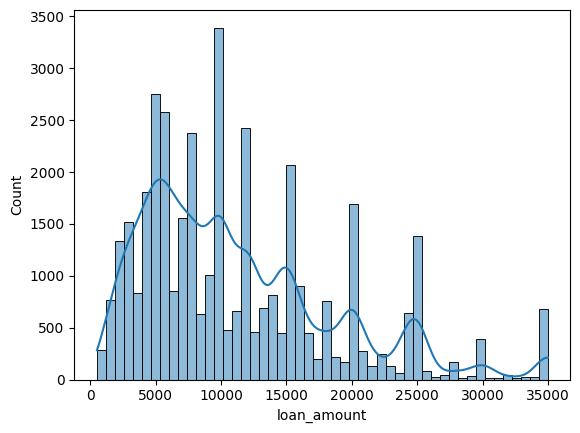

In [16]:
sns.histplot(data=df,
             x='loan_amount',
             kde=True,
             bins=50)
plt.show()

As we already know from Outlier Analysis and here can eaisly see that the Distribution of Loan Amount is Right Skewed

### Income distribution

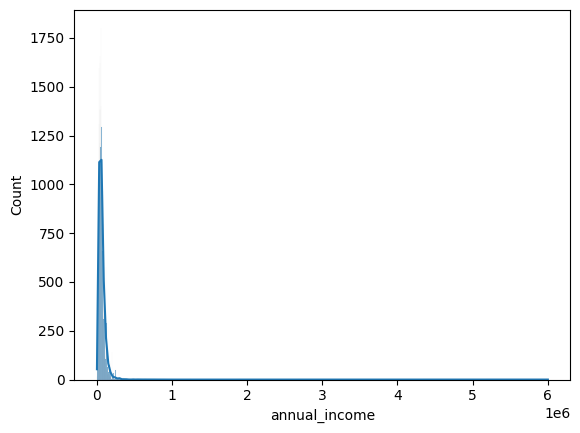

In [17]:
sns.histplot(data=df,
             x='annual_income',
             kde=True,
             )
plt.show()

The distribution plot eaisly shows that most individual earn less but few individuals earn extremly High due to which the tail got streched to Extreme Right

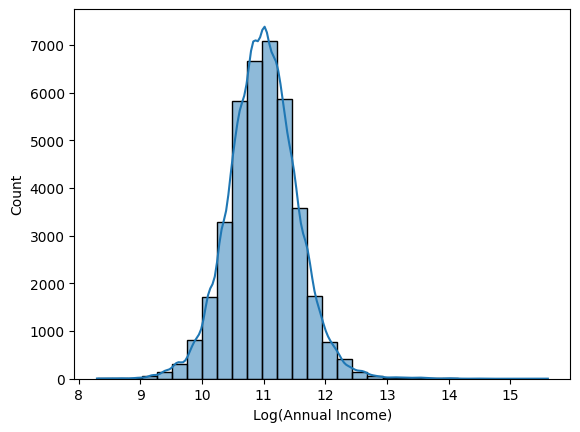

In [18]:
sns.histplot(np.log1p(df['annual_income']), bins=30, kde=True)
plt.xlabel("Log(Annual Income)")
plt.show()

To view the distribution clearly I applied Log Transformation which compressed the gaps and gave a cleaner look

### Distribution of Debt-to-Income Ratiop (DTI)

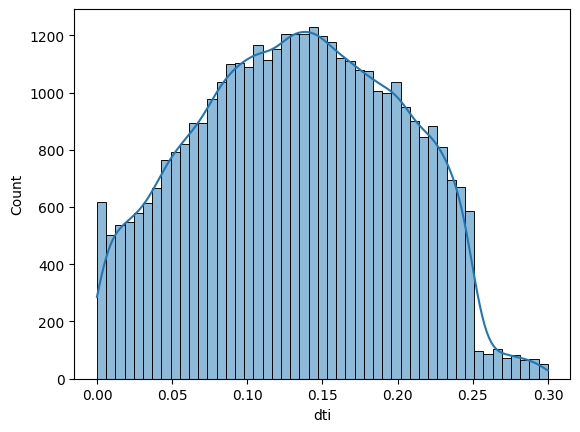

In [19]:
sns.histplot(data=df,
             x='dti',
             kde=True,
             )
plt.show()

From the distribution, it is evident that the bank has issued loans primarily to borrowers with a DTI of up to 30%. Since a DTI above 30–35% is generally considered risky, such high-DTI loans appear to be avoided.

### Analysis of Purpose of Loans

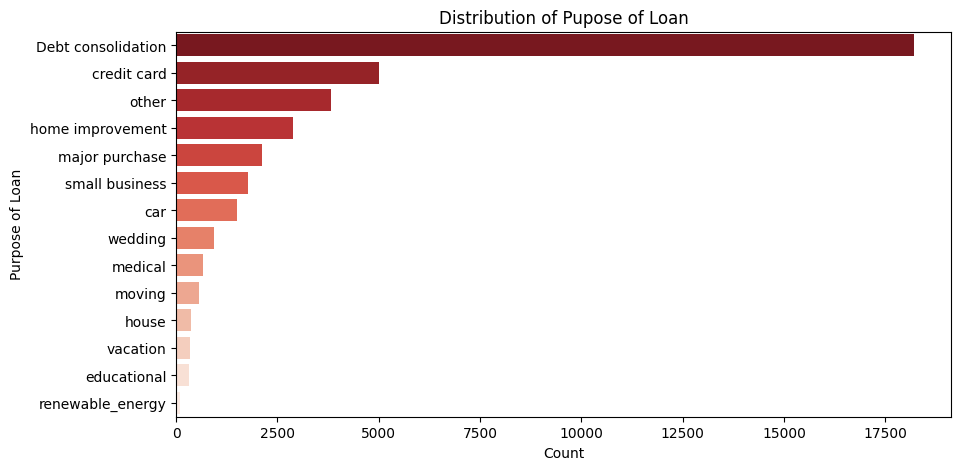

In [20]:
df3=df.groupby('purpose')['id'].count().reset_index(name='Count').sort_values(by='Count', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(data=df3,
            orient='h',
            y='purpose',
            x='Count',
            palette='Reds_r')
plt.xlabel('Count')
plt.ylabel('Purpose of Loan')
plt.title('Distribution of Pupose of Loan')
plt.show()

Factual Insight (from the chart)<br>

The majority of loans were issued for debt consolidation and credit card repayment, which dominates the portfolio. In contrast, purposes like car loans, medical expenses, education, and home improvement account for a much smaller share.<br><br>
Recommendation<br><br>
The bank could think about giving targeted discounts, reduced interest rates, or custom products for loan purposes that are not well represented, like education, medical, or housing loans, in order to diversify its loan portfolio and boost growth.


### Home Ownership Analysis

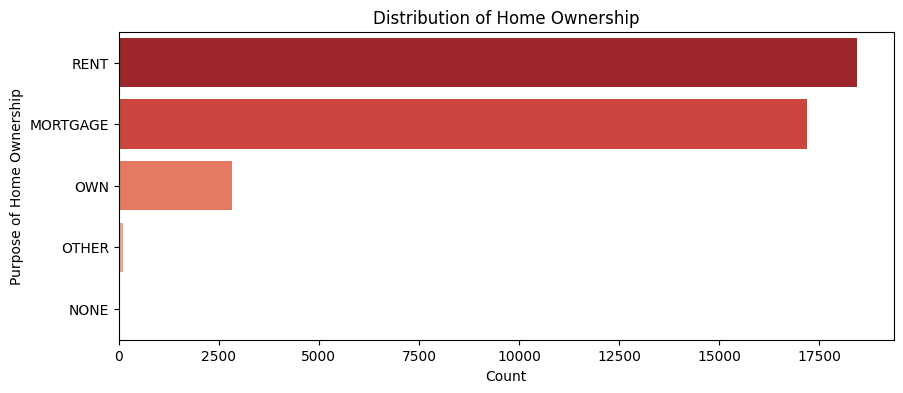

In [21]:
df4=df.groupby('home_ownership')['id'].count().reset_index(name='Count').sort_values(by='Count', ascending=False)

plt.figure(figsize=(10,4))
sns.barplot(data=df4,
            orient='h',
            y='home_ownership',
            x='Count',
            palette='Reds_r')
plt.xlabel('Count')
plt.ylabel('Purpose of Home Ownership')
plt.title('Distribution of Home Ownership')
plt.show()

Factual Insight (from the chart)<br><br>
Most of the leanders don't own their own home; they either rent or mortgage it. Only a small minority of people own the entire home.<br><br>
Recomendation<br><br>
For the lenders who lives on Rent or Mortgage homes Bank shoul target them with personalized Loan Products and Marketing Strategies like Home Rennovation Loan, less Interest Rate on Home Loans. And for the lenders who owns complete homes Bank should offer them Buisness Loans and Investment Loans 

## Bi-Variate Analysis

### Term Analysis

In [22]:
df4=df.groupby('term')['loan_amount'].sum().div(1e6).reset_index(name='Funded_Amount')

fig=px.pie(
    df4,
    values='Funded_Amount',
    names='term',
    hole=0.7,
    title="Funded Amount by Loan Term"
)
fig.update_traces(
    textinfo="label+percent",   
    marker=dict(colors=["#1f77b4", "#ff7f0e"])  # custom colors
)
fig.update_layout(width=550, height=400)
fig.show()

The bank offers loans only across two tenures — 36 months and 60 months. Among these, the 36-month tenure accounts for a larger share of funded loans.

### Total Loan Applications by State

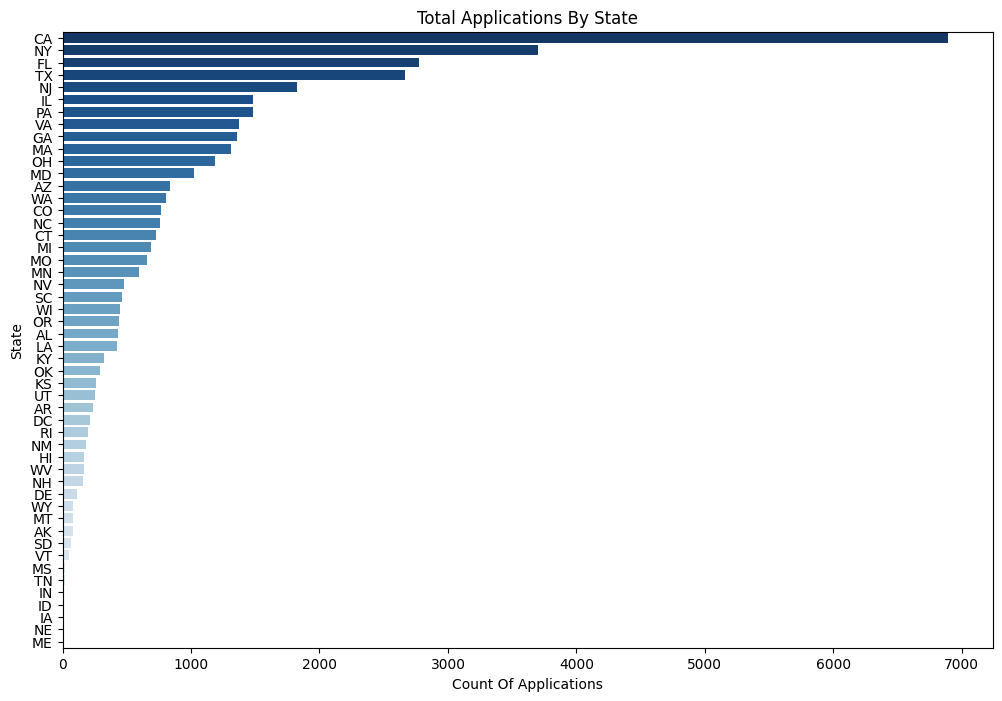

In [23]:
df6=df.groupby('address_state')['id'].count().reset_index(name='No of Loans').sort_values(by='No of Loans', ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(data=df6,
            y='address_state',
            x='No of Loans',
            orient='h',
            palette='Blues_r')
plt.ylabel('State')
plt.xlabel('Count Of Applications')  
plt.title('Total Applications By State')    
plt.show()  

### Total Funded Amount by State

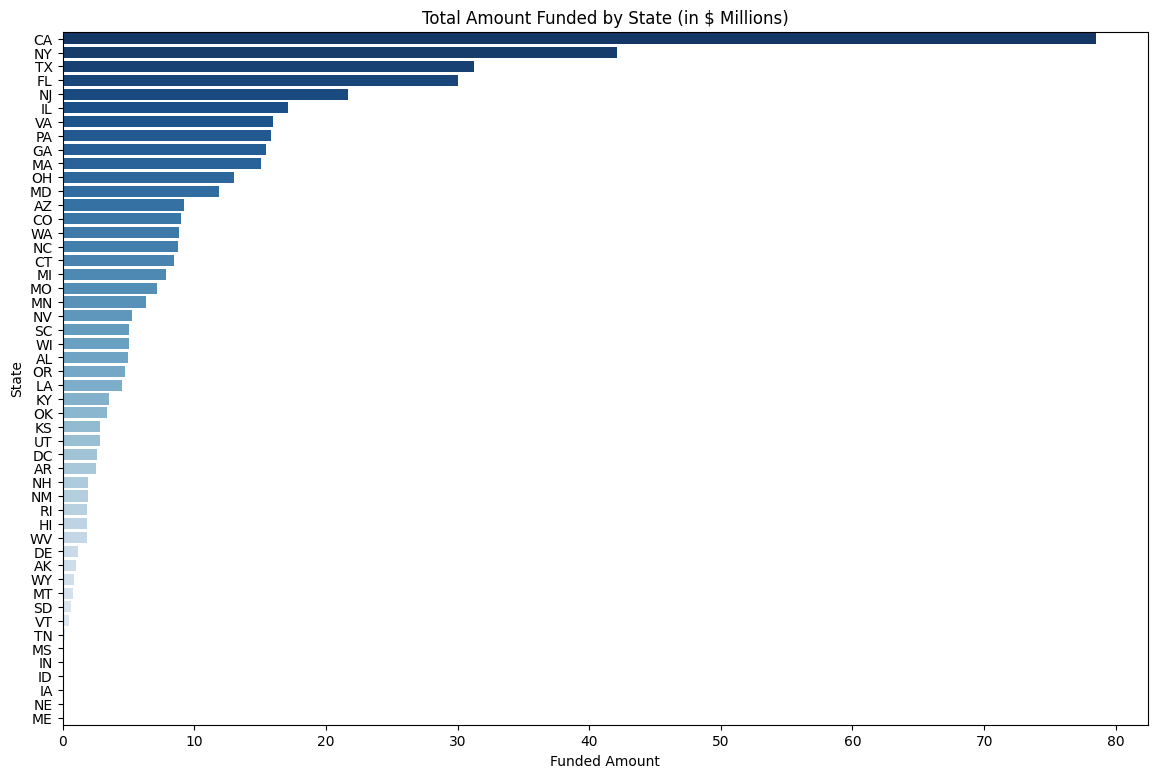

In [24]:
df5=df.groupby('address_state')['loan_amount'].sum().div(1e6).reset_index(name='amount_funded').sort_values(by='amount_funded', ascending=False)
plt.figure(figsize=(14,9))
sns.barplot(data=df5,
            y='address_state',
            x='amount_funded',
            palette='Blues_r',
            orient='h'
            )
plt.ylabel('State')
plt.xlabel('Funded Amount')
plt.title('Total Amount Funded by State (in $ Millions)')

plt.show()

Both of the charts above indicate the same trend: states with the most loan applications have received the most loan funds.<br>
California has the highest funding, followed by New York, Texas, and Florida, and so on.

### Total Funded Amount by Employee Length

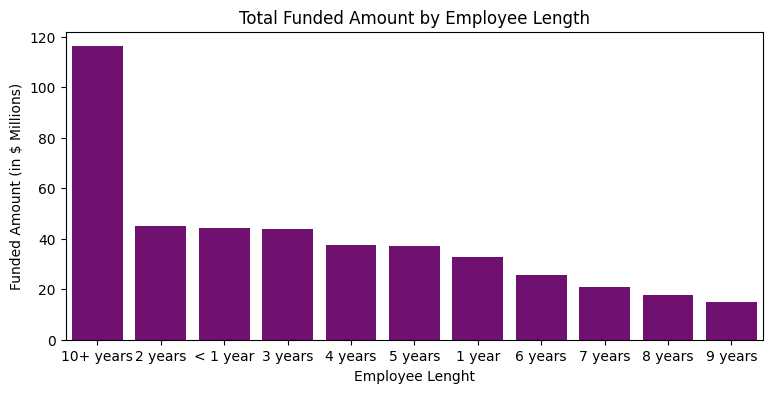

In [25]:
df7=df.groupby('emp_length')['loan_amount'].sum().div(1e6).reset_index(name='Funded Amount').sort_values(by='Funded Amount', ascending=False)
plt.figure(figsize=(9,4))
sns.barplot(data=df7,
            x='emp_length',
            y='Funded Amount',
            color='purple')
plt.xlabel('Employee Lenght')
plt.ylabel('Funded Amount (in $ Millions)')
plt.title('Total Funded Amount by Employee Length')
plt.show()


People with over 10 years of work experience seem to get the highest loan amounts. That makes sense — having a long, steady job history makes them look safer to lend to. For those with less than 10 years of experience, there doesn’t really seem to be a clear link between how long they’ve worked and the loan amount they get.

### Correlation Between Loan Amount and Interest Rate

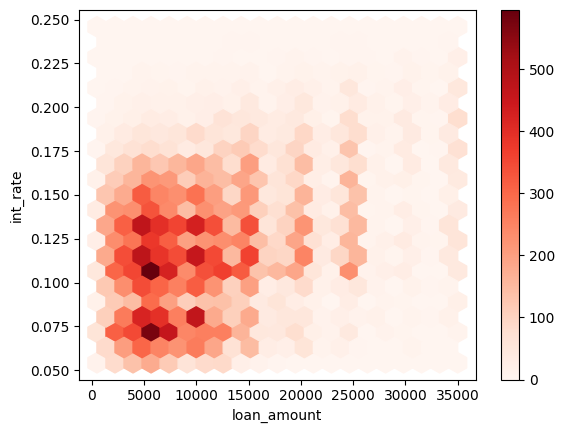

In [26]:
df.plot.hexbin(x='loan_amount',
                y='int_rate',
                  gridsize=20,
                    cmap='Reds')
plt.show()


### Insights
- Heavy Clustering around lower loan amount as most of the loan amounts under 15000<br><br>
- Interest rates are concentrated mostly around 0.07 (7%) to 0.15 (15%)<br><br>
- Strong Clustering an be observed around the left corner suggesting smaller loans with small to moderate interest rates are in Bulk<br><br>
- As from the plot we can not find any clear evidence that higher loan amounts are consistently associated with higher or lower interest rates, which suggests there does't exist Strong  Correlation between the two parameters


### Loan grade vs interest rate

In [27]:
# Mapping categorical values to numbers
grade_map={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7}
df['grade_num']=df['grade'].map(grade_map)

df[['grade_num','int_rate']].corr()


,grade_num,int_rate
grade_num,1.000000,0.948479
int_rate,0.948479,1.000000


In [28]:
df9=df.groupby('grade')['int_rate'].median().reset_index(name='Average Int_Rate').sort_values(by='Average Int_Rate')
df9

,grade,Average Int_Rate
0,A,0.0749
1,B,0.1099
2,C,0.1349
3,D,0.1562
4,E,0.1756
5,F,0.1947
6,G,0.2114


### Insights
- The correlation analysis shows a very strong positive relationship (0.94) between loan grade and interest rate.<br><br>
- This indicates that the bank’s grading system plays a major role in determining the interest rate offered to borrowers — lower grades are associated with higher interest rates, while higher grades secure lower rates.

### Loan Grade vs Debt-to-Income Ratio (DTI)

In [29]:
df10=df.groupby('grade')['dti'].mean().reset_index(name='Average DTI')
df10

,grade,Average DTI
0,A,0.120383
1,B,0.134321
2,C,0.139151
3,D,0.139808
4,E,0.140953
5,F,0.141738
6,G,0.140594


The average DTI across loan grades (A–G) is almost the same, staying between 0.12 and 0.14 — that’s only a tiny difference of about 0.02. This shows that DTI doesn’t really play a big role in how the bank assigns grades. Instead, the bank is probably looking more at things for deciding Grades

### Grade vs Loan Status

In [30]:
pd.crosstab(df['grade'], df['loan_status'])

loan_status,Charged Off,Current,Fully Paid
grade,,,
A,552,35,9102
B,1343,327,10004
C,1266,257,6381
D,1072,216,3894
E,691,175,1920
F,311,71,646
G,98,17,198


Loan grades clearly line up with how well people repay. Borrowers in Grades A and B mostly pay off their loans, with very few defaults. But as we move down from C to G, defaults become more common. In fact, loans in Grades F and G are much riskier, with a big chunk ending up in default. This shows the bank’s grading system is doing a good job of flagging higher-risk borrowers.

### Charged Off Loans vs Purpose

In [32]:
charged_off = df[df['loan_status'] == 'Charged Off']['purpose'].value_counts()
print(charged_off)


purpose
Debt consolidation    2651
other                  587
credit card            508
small business         455
home improvement       327
major purchase         206
car                    155
medical                100
wedding                 86
moving                  84
house                   57
educational             50
vacation                50
renewable_energy        17
Name: count, dtype: int64


Majority of the loans which has been charged off was taken for the purpose of Debt consolidation followed by Credit Crads and others

## Multi-Variate Analysis

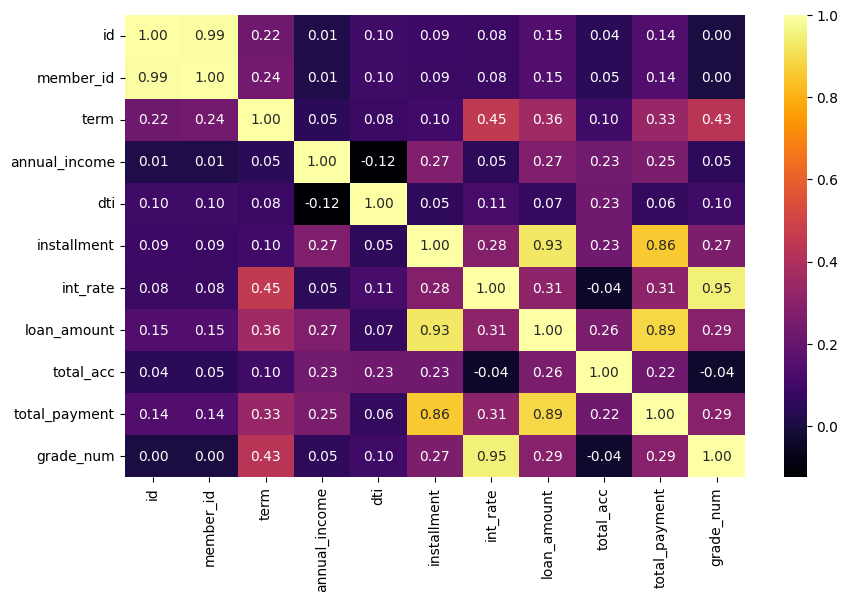

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),
            annot=True,
            fmt='.2f',
            cmap='inferno')
plt.show()

Apart from expected strong correlations like installment & loan_amount and grade_num & int_rate, no other variables in the heatmap show noteworthy linear relationships, indicating minimal multicollinearity in the dataset.

## Time Based Analysis

### MTD - Total Funded Amount 

In [34]:
latest_date=df['issue_date'].max()
latest_year=latest_date.year
latest_month=latest_date.month

mtd=df[(df['issue_date'].dt.year==latest_year) & (df['issue_date'].dt.month==latest_month)]

funded_amount_mtd=mtd['loan_amount'].sum()
funded_amount_millions=funded_amount_mtd/1000000
print(f"MTD Total Amount Funded (for {latest_date.strftime("%B %Y")}) : {funded_amount_millions:.2f}M")

MTD Total Amount Funded (for December 2021) : 53.98M


### MTD - Total Amount Recieved

In [35]:
latest_date=df['issue_date'].max()
latest_year=latest_date.year
latest_month=latest_date.month

mtd=df[(df['issue_date'].dt.year==latest_year) & (df['issue_date'].dt.month==latest_month)]

funded_amount_mtd=mtd['total_payment'].sum()
funded_amount_millions=funded_amount_mtd/1000000
print(f"MTD Total Amount Recieved (for {latest_date.strftime("%B %Y")}) : {funded_amount_millions:.2f}M")

MTD Total Amount Recieved (for December 2021) : 58.07M


Clearly as MTD Total Amount Recieved is greater than MTD Total Amount Funded, which shows a good sign as Bank is in Profit

When working with historical datasets, since we don’t have ‘today,’ I usually take the latest available date in the data as the reference point and then filter that entire month to calculate MTD. 

### Total Amount Funded by Month

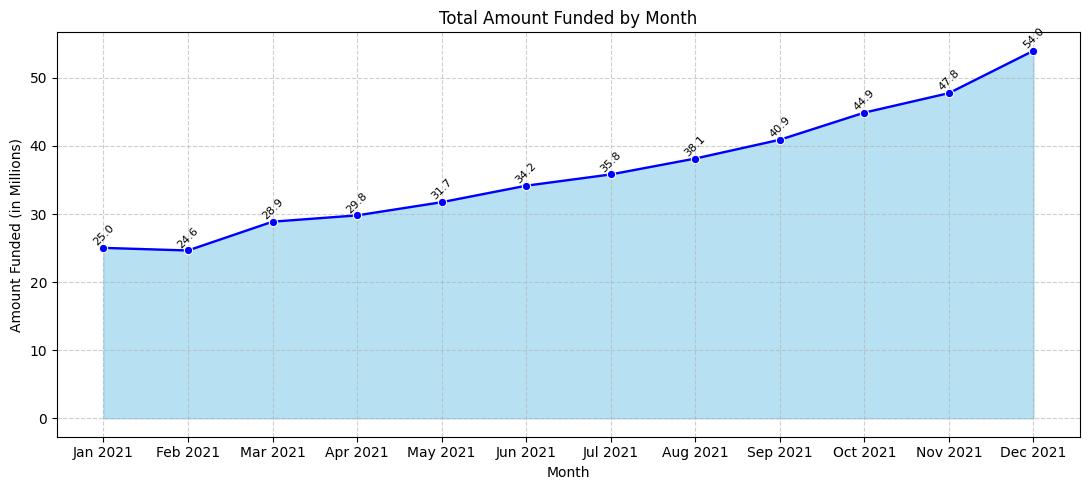

In [36]:
df['issue_date']=pd.to_datetime(df['issue_date'])

monthly_trends=(df.groupby(pd.Grouper(key='issue_date',freq='M'))['loan_amount'].sum().div(1e6).reset_index(name='loan_amount_millions'))
monthly_trends['month_name'] = monthly_trends['issue_date'].dt.strftime('%b %Y')

plt.figure(figsize=(11,5))
plot=sns.lineplot(
    data=monthly_trends,
    x='month_name',
    y='loan_amount_millions',
    marker='o',
    color='blue',
    linewidth=1.7
)
plt.fill_between(
    monthly_trends['month_name'],
    monthly_trends['loan_amount_millions'],
    color='skyblue',
    alpha=0.6
)
for x, y in zip(monthly_trends['month_name'], monthly_trends['loan_amount_millions']):
    plt.text(x, y + 0.05, f"{y:.1f}", ha='center', va='bottom', fontsize=8, rotation=45)
    
plt.xlabel('Month')
plt.ylabel('Amount Funded (in Millions)')
plt.title('Total Amount Funded by Month')
plt.grid(True,linestyle='--',alpha=0.6)
plt.tight_layout()

plt.show()


### Total Amount Recieved by Month

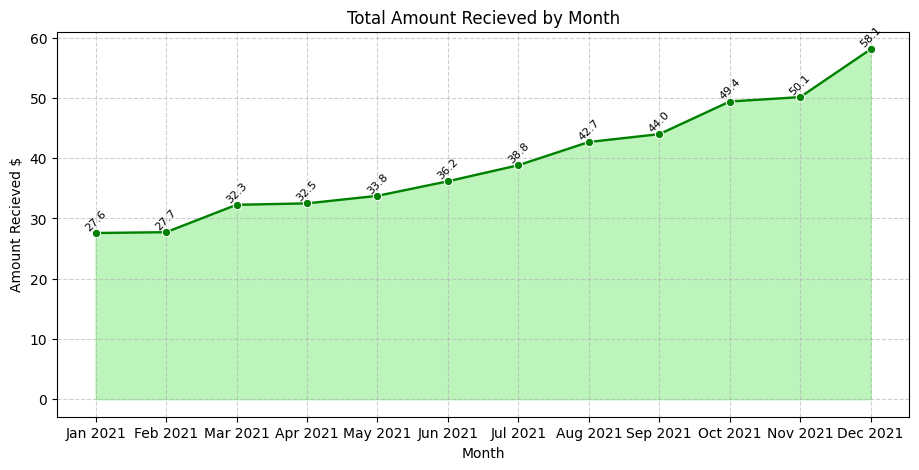

In [37]:
df['issue_date']=pd.to_datetime(df['issue_date'])

monthly_trends_rec=df.groupby(pd.Grouper(key='issue_date',freq='M'))['total_payment'].sum().div(1e6).reset_index(name='Recieved_amount_millions')
monthly_trends_rec['Month_name']=monthly_trends_rec['issue_date'].dt.strftime("%b %Y")

plt.figure(figsize=(11,5))

sns.lineplot(
    data=monthly_trends_rec,
    x='Month_name',
    y='Recieved_amount_millions',
    marker='o',
    color='green',
    linewidth=1.7
)
plt.fill_between(
    monthly_trends_rec['Month_name'],
    monthly_trends_rec['Recieved_amount_millions'],
    color='lightgreen',
    alpha=0.6
)
for x, y in zip(monthly_trends_rec['Month_name'], monthly_trends_rec['Recieved_amount_millions']):
    plt.text(x, y + 0.05, f"{y:.1f}", ha='center', va='bottom', fontsize=8, rotation=45)
    

plt.xlabel('Month')
plt.ylabel('Amount Recieved $')
plt.title('Total Amount Recieved by Month')
plt.grid(True,linestyle='--',alpha=0.6)
plt.show()

### Total Loan Application by Months

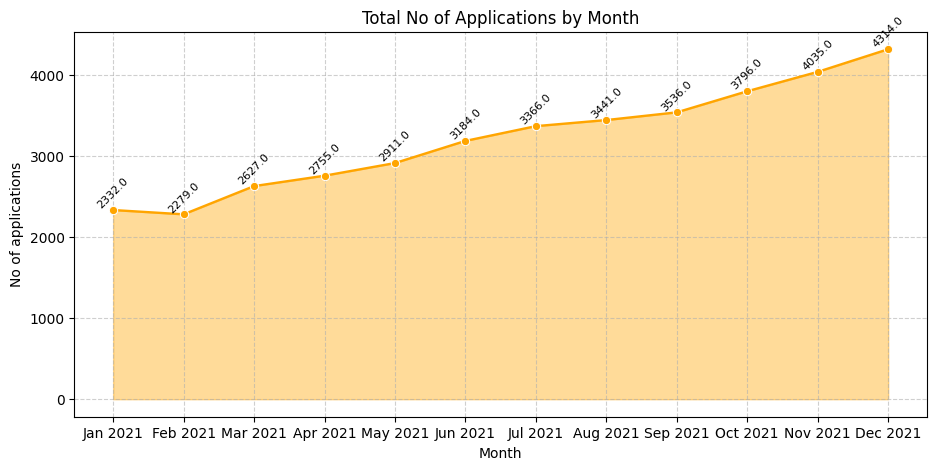

In [38]:
df['issue_date']=pd.to_datetime(df['issue_date'])

monthly_trends_LA=df.groupby(pd.Grouper(key='issue_date',freq='M'))['id'].count().reset_index(name='Count by Month')
monthly_trends_LA['Month_name']=monthly_trends_LA['issue_date'].dt.strftime('%b %Y')
plt.figure(figsize=(11,5))
sns.lineplot(
    data=monthly_trends_LA,
    x='Month_name',
    y='Count by Month',
    marker='o',
    color='orange',
    linewidth=1.7
)
plt.fill_between(
    monthly_trends_LA['Month_name'],
    monthly_trends_LA['Count by Month'],
    color='orange',
    alpha=0.4
)
for x, y in zip(monthly_trends_LA['Month_name'], monthly_trends_LA['Count by Month']):
    plt.text(x, y + 0.05, f"{y:.1f}", ha='center', va='bottom', fontsize=8, rotation=45)
    

plt.xlabel("Month")
plt.ylabel("No of applications")
plt.title("Total No of Applications by Month")
plt.grid(True,linestyle='--',alpha=0.6)
plt.show()

### Insights<br>
- All three trend charts — loan applications, amount received, and amount funded — show the same upward movement, with values nearly doubling by year-end compared to the start.<br><br>
- This indicates a strong rise in loan demand and disbursement, suggesting the bank’s lending activity expanded significantly and likely boosted profitability.

## Key Metrices

## Good Loan Metrices

Good loan is considered as loan which is either fully paid or is being currently being paid 

In [39]:
df_good_loan=df[df['loan_status'].isin(["Fully Paid","Current"])]
Good_loan_count=df_good_loan['id'].count()
total_loan_applications=df['id'].count()

good_loan_funded_amount=df_good_loan['loan_amount'].sum()
good_loan_recieved_amount=df_good_loan['total_payment'].sum()

good_loan_percentage=(Good_loan_count/total_loan_applications)*100

print(f"Count of Good Loans: {Good_loan_count}")
print(f"Total Amount Funded In Good Loans (in Millions) : ${good_loan_funded_amount/1e6:.2f}M")
print(f"Total Amount Recieved from Good Loans (in Millions) : ${good_loan_recieved_amount/1e6:.2f}M")
print(f"Percentage of Good Loans: {good_loan_percentage:.2f}%")


Count of Good Loans: 33243
Total Amount Funded In Good Loans (in Millions) : $370.22M
Total Amount Recieved from Good Loans (in Millions) : $435.79M
Percentage of Good Loans: 86.18%


## Bad Loan Metrices

Bad Loan is considered as the loans which are not performing well in repayment 

In [40]:
bad_loan=df[df['loan_status'].isin(['Charged Off'])]

Count_bad_loan=bad_loan['id'].count()
Count_total_loan=df['id'].count()

total_amountfunded_badloan=bad_loan['loan_amount'].sum()
total_amountrecieved_badloan=bad_loan['total_payment'].sum()

bad_loan_percentage=(Count_bad_loan/Count_total_loan)*100

print(f"Count of Bad Loans: {Count_bad_loan}")
print(f"Total Amount Funded in Bad Loans: {total_amountfunded_badloan/1e6:.2f}M")
print(f"Total Amount Recieved from Bad Loans: {total_amountrecieved_badloan/1e6:.2f}M")
print(f"Percentage of Bad Loans: {bad_loan_percentage:.2f}%")

Count of Bad Loans: 5333
Total Amount Funded in Bad Loans: 65.53M
Total Amount Recieved from Bad Loans: 37.28M
Percentage of Bad Loans: 13.82%
